In [1]:
import pandas as pd
import seaborn as sns
sns.set_color_codes()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
class_system = 'IPC4'
data_directory = '../data/'

figures_directory = '../manuscript/figs/'
save_as_manuscript_figures = True

In [3]:
sns.set_style('white')
fig_one_col = 2.3
fig_two_col = 2.3*2+0.053937
fig_three_col = 7.007874#6.93
from scipy.constants import golden

import pylab
pylab.rcParams['xtick.major.pad']='4'
pylab.rcParams['ytick.major.pad']='4'
pylab.rcParams['figure.subplot.left']='0'
pylab.rcParams['figure.subplot.right']='1'
pylab.rcParams['figure.subplot.bottom']='0'
pylab.rcParams['figure.subplot.top']='1'
pylab.rcParams['savefig.pad_inches']='0'
pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('text', usetex=False)
font_size = 7
rc('font', size=font_size)
rc('axes', labelsize=font_size)
rc('ytick', labelsize=font_size)
rc('xtick', labelsize=font_size)
rc('legend', fontsize=font_size)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(9.0)
panel_label_font.set_family("sans-serif")

def add_panel_label(ax=None,
               letter=None,
               coord=None):
    global panel_label
    if letter is None:
        letter = panel_label
        panel_label = chr(ord(panel_label) + 1)
    if ax is None:
        ax = gca()
    if coord is None:
        coord = annotate_coord
    
    ax.text(coord[0], coord[1], letter, 
        transform=ax.transAxes, fontproperties=panel_label_font)
    
figs = []

def to_percent(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_percent100(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(y).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_percent_diff(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100*(y-1)).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_multiple(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
#     s = str(100 * y).rstrip('0').rstrip('.')

#     # The percent symbol needs escaping in latex
#     if matplotlib.rcParams['text.usetex'] is True:
#         s = s + r'$\%$'
#     else:
#         s = s + '%'
    return '%ix'%y
from matplotlib.ticker import FuncFormatter
percent_formatter = FuncFormatter(to_percent)
percent100_formatter = FuncFormatter(to_percent100)
percentdiff_formatter = FuncFormatter(to_percent_diff)
multiple_formatter = FuncFormatter(to_multiple)

In [4]:
def error_shading(x, y, y_var, l, ax=None, alpha=.3, var_fun=None, axis=-1):
    if ax is None:
        ax=gca()
    if var_fun is not None:
        y_var = var_fun(y_var, axis=axis)
    ax.fill_between(x,y+y_var, y-y_var, alpha=alpha, color=l[0].get_color())    

In [5]:
store = pd.HDFStore(data_directory+'organized_patent_data.h5')
agent_lookup = store['agents_lookup_%s'%class_system]
explorer_lookup = store['agents_lookup_explorers_%s'%class_system]
patent_data = store['data_%s'%class_system]
classes_lookup = store['classes_lookup_%s'%class_system]
store.close()

In [7]:
print("Number of Patents: %i"%patent_data['Patent'].nunique())
print("Number of Inventors: %i"%patent_data['Agent'].nunique())

print("Portion of Inventors who Patent Only Once: %.0f%%"%(100*(1-mean(agent_lookup['Agent_Number_of_Patents_All_Time']>1))))
x = (patent_data.sort('Agent_Number_of_Patents_All_Time', 
                  ascending=False).drop_duplicates('Patent')['Agent_Number_of_Patents_All_Time']>1).mean()
print("Portion of Patents Authored by a Repeat Inventor %.0f%%"%(100*x))
print("Portion of Inventors who Explore: %.0f%%"%(100*(mean(agent_lookup['Agent_Number_of_Classes_All_Time']>1))))

ind = agent_lookup['Agent_Number_of_Patents_All_Time']>1
x = sum(agent_lookup.ix[ind, 'Agent_Number_of_Classes_All_Time']>1)/sum(ind)
print("Portion of Repeat Inventors who Explore: %.0f%%"%(100*x))

x = mean(patent_data.sort('Agent_Number_of_Classes_All_Time', 
                 ascending=False).drop_duplicates('Patent')['Agent_Number_of_Classes_All_Time']>1)
print("Portion of Patents Authored by Explorers: %.0f%%"%(100*x))

x = mean(patent_data.sort('Agent_Class_Number', ascending=False).drop_duplicates('Patent')['Agent_Class_Number']>1)
print("Portion of Patents Authored by an Explorer Who Entered the Patent's Domain from Elsewhere: %.0f%%"%(100*x))

Number of Patents: 3910549
Number of Inventors: 2756382
Portion of Inventors who Patent Only Once: 60%
Portion of Patents Authored by a Repeat Inventor 84%
Portion of Inventors who Explore: 28
Portion of Repeat Inventors who Explore: 71%

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)



Portion of Patents Authored by Explorers: 77%
Portion of Patents Authored by an Explorer Who Entered the Patent's Domain from Elsewhere: 56%


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [8]:
p = patent_data.groupby('Class_ID')["Patent"].nunique()

p.name = 'Patent_Count'
class_data = pd.DataFrame(p)

class_data = class_data.sort_index()

class_data.index.name = 'Class_ID'


class_data['Agent_Count'] = patent_data.groupby('Class_ID')["Agent"].nunique()
class_data['Immigrant_Count'] = patent_data[patent_data['Agent_Class_Number']>1].groupby('Class_ID')["Agent"].nunique()

class_data['Patent_Count_log10'] = log10(class_data['Patent_Count'])
class_data['Agent_Count_log10'] = log10(class_data['Agent_Count'])
class_data['Immigrant_Count_log10'] = log10(class_data['Immigrant_Count'])

In [9]:
class_names = pd.read_csv(data_directory+'IPC4_descriptions.csv')

class_data['Description'] = class_names.set_index('Class').ix[classes_lookup.ix[class_data.index.values, 'Class_Name']]['Short Description'].values

In [10]:
class_data['IPC4'] = classes_lookup.ix[class_data.index, 'Class_Name']

In [11]:
class_data['Id'] = class_data['IPC4']

class_data.to_csv(data_directory+'Examples_and_Visualizations/class_data_and_descriptions.csv')

In [12]:
relatedness_type = 'Class_Cited_by_Class_Count'
relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type

Movement Statistics
====

Inventors Move into New Domains a Lot

In [13]:
def p_entry(ax, data, label='', plot_legend=False):
    data.groupby('Agent_Patent_Number')['New_Class'].mean().plot(label=label, ax=ax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(2,100)
    ax.set_xticks([2,10,100], ['2nd', '10th', '100th'])
    # gca().set_xticklabels()
    ax.set_ylim(ymin=3*10**-2)
    ax.set_xlabel("Inventor's Patent Number")
    ax.set_ylabel("Probability Inventor Patents \n in a New Technology Domain")
#     sns.despine()
    if plot_legend:
        ax.legend(loc=1, title='Classification System')
    return ax

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


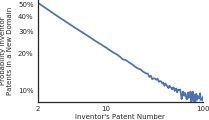

In [14]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

ax = fig.add_subplot(1,1,1)

ax = p_entry(ax, patent_data, label='IPC4 (%i classes)'%629)

ax.set_yticks([.1, .2, .3, .4, .5])
ax.set_yticklabels([.1, .2, .3, .4, .5])
ax.set_ylim(ymin=.08, ymax=.55)
ax.yaxis.set_major_formatter(percent_formatter)
# ax.set_ylabel("p(Inventor Patents\nin a New Domain)")
ax.set_ylabel("Probability Inventor\nPatents in a New Domain")

ax.set_xticks([2,10,100])
ax.set_xticklabels([2,10,100])
ax.set_xlabel("Inventor's Patent Number", labelpad=2)


sns.despine()
# fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'movement_frequency.pdf', bbox_inches='tight')

Inventors Move to Related Classes

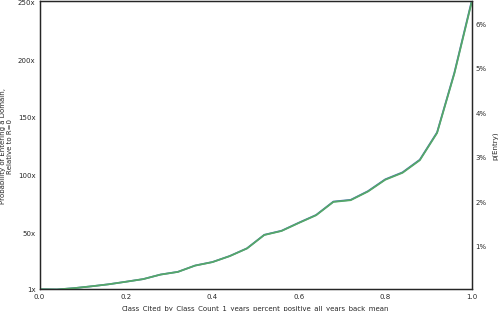

In [42]:
def align_yaxis(ax1, v1, ax2, v2):
    #Code from: http://stackoverflow.com/a/10482477
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
popularity = 'Class_Patent_Count_1_years_Previous_Year_Percentile'

year = 2010

f = data_directory+'Predictive_Models/PDF/%s/%s/'%(relatedness,popularity)
data = pd.read_hdf(f+'cumulative.h5', 'data/year_%i'%year).astype('float32')
entries = pd.read_hdf(f+'cumulative.h5', 'entries/year_%i'%year).astype('float32')

pdf_r = (entries.groupby(level=[0]).sum()/data.groupby(level=[0]).sum()).fillna(0)
pdf_r.name = 'p(Entry)'

fig = figure()

ax = fig.add_subplot(1,1,1)
(pdf_r/pdf_r.ix[0]).plot(ax=ax, color='b')
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
#ylabel('p(Entry)/p(Entry|R=0)')
ax.set_ylabel("Probability of Entering a Domain,\nRelative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
ax2 = twinx(ax)
pdf_r.plot(ax=ax2, color='g')
# ax2.set_ylabel('p(Entry)')
ax2.set_ylim(ymax = pdf_r.max())
ax2.set_ylabel('p(Entry)')
ax2.yaxis.set_major_formatter(percent_formatter)

align_yaxis(ax,1, ax2, pdf_r.ix[0])
xlabel("R (% of Years the Domain was More\nConnected than Expectation to the Inventor's Current Domain)")

In [16]:
print("Total number of Entries: %i"%entries.sum())

Total number of Entries: 1763920


Most Domains are Persistently Less Connected than Expected, but a Few are Persistently More Connected

In [19]:
networks_store = pd.HDFStore(data_directory+'Class_Relatedness_Networks/class_relatedness_networks.h5')

In [20]:
def relabel_classes_in_network(network):
    network.index = classes_lookup.set_index('Class_Name').ix[network.index, 'Class_ID']
    network.columns = classes_lookup.set_index('Class_Name').ix[network.columns, 'Class_ID']
    network = network.ix[classes_lookup['Class_ID'], classes_lookup['Class_ID']]
    for i in network.index:
        network.ix[i,i] = 0
        
def relabel_classes_in_network_panel(network):
    network.major_axis = classes_lookup.set_index('Class_Name').ix[network.major_axis, 'Class_ID']
    network.minor_axis = classes_lookup.set_index('Class_Name').ix[network.minor_axis, 'Class_ID']
    network = network.ix[:, classes_lookup['Class_ID'], classes_lookup['Class_ID']]
    for i in network.items:
        for j in network.major_axis:
            network.ix[i,j,j] = 0
    return network

In [146]:
network_empirical = networks_store['empirical_1_years_IPC4'][relatedness_type]
network_expected = networks_store['randomized_mean_1_years_IPC4'][relatedness_type]

In [31]:
print("Number of Citations Used in Relatedness Network: %i"%network_empirical.sum().sum().sum())

Number of Citations Used in Relatedness Network: 35129936


In [38]:
from scipy.stats import pearsonr
r, p = pearsonr(networks_store['empirical_IPC4']['Class_Cited_by_Class_Count'].ix[2010].values.ravel(),
                networks_store['empirical_IPC4']['Class_Cites_Class_Count'].ix[2010].values.ravel()
               )

print("Correlation between number of citations between two classes in one direction vs. the other direction: %.4f"%r)

Correlation between number of citations between two classes in one direction vs. the other direction: 0.9959


In [110]:
network_expected = relabel_classes_in_network_panel(network_expected)
network_empirical = relabel_classes_in_network_panel(network_empirical)

In [111]:
network_ratio = network_empirical.divide(network_expected)

In [112]:
n_years = sum(network_empirical.sum().sum()>0)#network_empirical.shape[0]
network_positive_count = (network_empirical>network_expected).cumsum(axis=0).iloc[-1]

for i in network_positive_count.index:
    network_positive_count.ix[i,i] = nan
network_positive_percent = network_positive_count/n_years

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


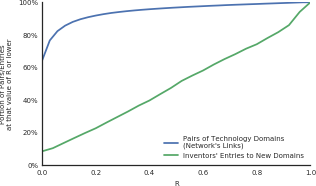

In [21]:
fig = figure(figsize=(fig_two_col,fig_two_col/golden))

ax = fig.add_subplot(1,1,1)

R_frequency_network = pd.value_counts(network_positive_percent.values.ravel()).sort_index()
R_frequency_entries = entries.groupby(level=relatedness).sum()

(R_frequency_network.cumsum()/R_frequency_network.sum()).plot(ax=ax, label="Pairs of Technology Domains\n(Network's Links)")
(R_frequency_entries.cumsum()/R_frequency_entries.sum()).plot(ax=ax, label="Inventors' Entries to New Domains")

ax.set_ylim(0,1)

ax.yaxis.set_major_formatter(percent_formatter)
ax.set_ylabel('Portion of Pairs/Entries\nat that value of R or lower')
ax.set_xlabel('R')
ax.legend(loc='best')
sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_frequencies_in_network_and_entries.pdf', bbox_inches='tight')

In [22]:
always_positive = list(network_positive_count[network_positive_count==n_years].stack().index)
always_negative = list(network_positive_count[network_positive_count==0].stack().index)
in_between = list(network_positive_count[(network_positive_count>0)*(network_positive_count<n_years)].stack().index)

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [23]:
semiconductor = class_data[class_data['Description'].apply(lambda x: 'Semiconductor' in x)].index.values[0]
static_storage = class_data[class_data['Description'].apply(lambda x: 'Static Storage' in x)].index.values[0]
hydraulic = class_data[class_data['Description'].apply(lambda x: 'Hydraulic' in x)].index.values[0]
photography = class_data[class_data['Description'].apply(lambda x: 'Photograph' in x)].index.values[0]

positive_example = (semiconductor, static_storage)
between_example = (semiconductor, photography)
negative_example = (semiconductor, hydraulic)

class_data.ix[semiconductor, 'Description'] = 'Semiconductors'
class_data.ix[static_storage, 'Description'] = 'Static Info Storage'
class_data.ix[hydraulic, 'Description'] = 'Hydraulics'

In [24]:
n_links = prod(network_positive_count.shape)-network_positive_count.shape[0]

In [25]:
R_frequency_entries = R_frequency_entries/R_frequency_entries.sum()

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


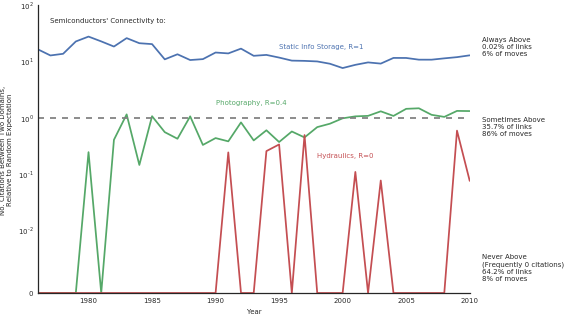

In [26]:
a = network_ratio.ix[:,positive_example[0], positive_example[1]]
a.plot(label='Always More')

n = len(always_positive)/n_links

text(2011, a.iloc[-1], 'Always Above\n'
     '%.2f%% of links\n%.0f%% of moves'%(
                          n*100,
                         R_frequency_entries.ix[1]*100))
b = network_ratio.ix[:,between_example[0], between_example[1]]
b.plot(label='Sometimes More, Sometimes Less')

n = len(in_between)/n_links

text(2011, .5, 'Sometimes Above\n'
     '%.1f%% of links\n%.0f%% of moves'%(
                                                    n*100,
                                                   R_frequency_entries.iloc[1:-1].sum()*100),
    )
n = len(always_negative)/n_links

c = network_ratio.ix[:,negative_example[0], negative_example[1]]
c.plot(label='Always Less')
text(2011, .001, 'Never Above\n(Frequently 0 citations)\n'
     '%.1f%% of links\n%.0f%% of moves\n'
     ''%(
                                n*100,
                               R_frequency_entries.ix[0]*100))


yscale('symlog', linthreshy=.01)
plot(xlim(), (1,1), color='gray', linestyle='--')
xlabel("Year")
#     legend(loc='upper right')#, title="No. Citations Relative to Random Expectation")
sns.despine()
ylabel("No. Citations Between Two Domains,\nRelative to Random Expectation")

text(1977, 50, "%s' Connectivity to:"%class_data.ix[int(negative_example[0]), 'Description'])

text(1995, a.ix[1995]*1.5, "%s, R=1"%(class_data.ix[int(positive_example[1]), 'Description']),# (a>1).mean()),
    color='b')

text(1990, b.ix[1990]*4, "%s, R=%.1f"%(class_data.ix[int(between_example[1]), 'Description'], (b>1).mean()),
    color='g')

text(1998, .2, "%s, R=0"%(class_data.ix[int(negative_example[1]), 'Description']),# (c>1).mean()),
    color='r')

Domains that Many Other Domains Cite Above Expectation in Many Years are Larger

In [27]:
# def find_closest(A, target):
#     #Code for this function from http://stackoverflow.com/a/8929827
#     #A must be sorted
#     idx = A.searchsorted(target)
#     idx = np.clip(idx, 1, len(A)-1)
#     left = A[idx-1]
#     right = A[idx]
#     idx -= target - left < right - target
#     return idx

# network_weighted = network_positive_percent.applymap(lambda x: pdf_r.iloc[find_closest(pdf_r.index.values, x)])
# for i in network_weighted.index:
#     network_weighted.ix[i,i] = 0

In [28]:
# network = network_positive_percent
# these_connections = network[153]
# R = these_connections
# names = class_data.ix[these_connections.index, 'Description']
# pImmigration = network_weighted[153]/pdf_r.iloc[0]
# f = lambda x: .2*x+1.1
# performance = f(R)
# example = pd.DataFrame({'R': R, 'Class': names, 'pImmigration': pImmigration, 'Performance': performance})
# example.sort_values('R', ascending=False, inplace=True)
# example.iloc[:50]

In [29]:
network_weighted_for_visualizing = network_positive_percent.copy()
network_weighted_for_visualizing.index = classes_lookup.set_index('Class_ID').ix[network_weighted_for_visualizing.index, 'Class_Name']
network_weighted_for_visualizing.columns = classes_lookup.set_index('Class_ID').ix[network_weighted_for_visualizing.columns, 'Class_Name']

network_weighted_for_visualizing.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing_directed.csv')

network_weighted_for_visualizing_undirected = (network_weighted_for_visualizing+network_weighted_for_visualizing.T)/2
network_weighted_for_visualizing_undirected.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing.csv')

network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected.copy()
network_weighted_for_visualizing_undirected_edgelist.ix[:,:] = tril(network_weighted_for_visualizing_undirected_edgelist.values)
network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected_edgelist[network_weighted_for_visualizing_undirected_edgelist>0].unstack().dropna()

network_weighted_for_visualizing_undirected_edgelist.index.names = ['Source', 'Target']
network_weighted_for_visualizing_undirected_edgelist.name = 'Weight'
network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected_edgelist.to_frame()
network_weighted_for_visualizing_undirected_edgelist['Type'] = 'Undirected'
network_weighted_for_visualizing_undirected_edgelist.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing_edge_list.csv',header=True)

In [43]:
entries = pd.DataFrame(entries).reset_index()

data = pd.DataFrame(data).reset_index()

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))
/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


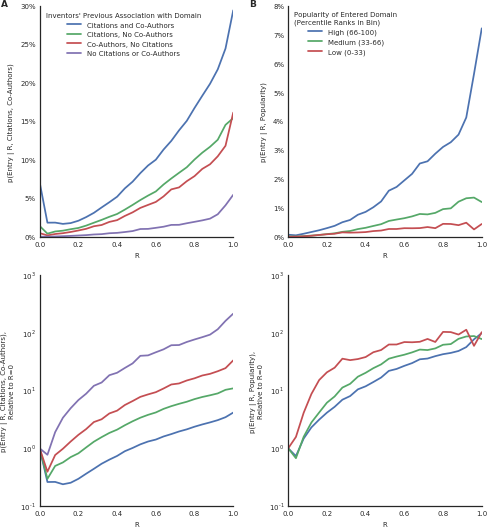

In [44]:
citations = 'Agent_Previous_Citations_to_Class'
coagents = 'CoAgent_Count_in_Class'

fig = figure(figsize=(fig_three_col,fig_three_col*golden*2/3))

n_rows = 2
n_cols = 2
this_ax = 0

annotate_coord = (-.2, 1)
panel_label = "A"


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

for name, ind in [('Citations and Co-Authors', (df[citations]==1)*(df[coagents]==1)),
             ('Citations, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, No Citations', (df[citations]==0)*(df[coagents]==1)),
             ('No Citations or Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Citations, Co-Authors)")
ax.legend(loc='upper left', title="Inventors' Previous Association with Domain")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)


#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High', 2),
                  ('Medium', 1),
                  ('Low', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
                                                                           thresholds[value]*100,
                                                                           thresholds[value+1]*100))
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Popularity)")
ax.legend(loc='upper left', title="Popularity of Entered Domain\n(Percentile Ranks in Bin)")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)



##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()
df['p(Entry)'] = df.groupby(['Agent_Previous_Citations_to_Class', 'CoAgent_Count_in_Class'])['p(Entry)'].apply(lambda x: x/x.iloc[0])

for name, ind in [('Citations and Co-Authors', (df[citations]==1)*(df[coagents]==1)),
             ('Citations, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, No Citations', (df[citations]==0)*(df[coagents]==1)),
             ('No Citations or Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Citations, Co-Authors),\nRelative to R=0")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
ax.set_yscale('log')


#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)

##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
pdf = pdf/pdf.ix[0]
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High', 2),
                  ('Medium', 1),
                  ('Low', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
                                                                           thresholds[value]*100,
                                                                           thresholds[value+1]*100))
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Popularity),\nRelative to R=0")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
ax.set_yscale('log')

####
# figs.append(fig)
fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_pdf_with_conditions.pdf', bbox_inches='tight')

Movement Prediction
====

In [39]:
target = 'entries_with_predictions_NB_4D'

store = pd.HDFStore(data_directory+'Agent_Entries/agent_%s_%s.h5'%(target, class_system), mode='r')
entries = store['%s_%s'%(target, class_system)]
store.close()

In [40]:
model_years = [1980, 1990, 2000]

1980
Application_Year
1981    0.972625
1982    0.972843
1983    0.974522
1984    0.974441
1985    0.974522
1986    0.976077
1987    0.976115
1988    0.977707
1989    0.979266
1990    0.980769
1991    0.979299
1992    0.980831
1993    0.980892
1994    0.982428
1995    0.984000
1996    0.982428
1997    0.983819
1998    0.982484
1999    0.982484
2000    0.982484
2001    0.982484
2002    0.980892
2003    0.980861
2004    0.980892
2005    0.980892
2006    0.980861
2007    0.979299
2008    0.980831
2009    0.985646
2010    0.982456
Name: Prediction_Rank_from_1980_NB_4D_with_Class_Cited_by_Class_Count_1_years_percent_positive_all_years_back_mean_and_Class_Patent_Count_1_years_Previous_Year_Percentile, dtype: float32
Application_Year
1981    0.886637
1982    0.897809
1983    0.905169
1984    0.903006
1985    0.905842
1986    0.908908
1987    0.909505
1988    0.912910
1989    0.917684
1990    0.918767
1991    0.921964
1992    0.924259
1993    0.925073
1994    0.925435
1995    0.931670
1996    0

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


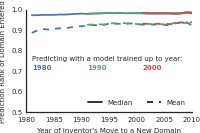

In [41]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

for model_year in model_years:
    print(model_year)
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
    p, = plot(q.index, q.values, linestyle='-')
    print(q)


    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
    p, = plot(q.index, q.values, linestyle='--', color=p.get_color())
    print(q)
    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .75, "Predicting with a model trained up to year:")
ylim(.5,1)


plot([],[], linestyle='-', color='k', label='Median')
plot([],[], linestyle='--', color='k', label='Mean')
legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")

plot([],[], )
plot([],[], linestyle='--', color='k', label='Mean')

ylabel("Prediction Rank of Domain Entered")
xlabel("Year of Inventor's Move to a New Domain")
sns.despine()

figs.append(fig)
if save_as_manuscript_figures:
    savefig(figures_directory+'prediction_ranks.pdf')

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


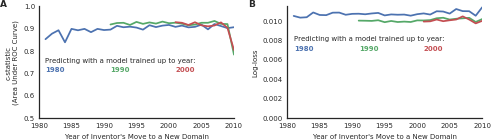

In [35]:
fig = figure(figsize=(fig_three_col,fig_three_col/golden/2))

n_rows = 1
n_cols = 2
this_ax = 0

annotate_coord = (-.2, 1)
panel_label = "A"


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

from sklearn.metrics import auc
import powerlaw
f = lambda x: auc(*powerlaw.ccdf(x))
def f(x):
    try:
        return auc(*powerlaw.ccdf(x))
    except:
        return nan
    
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].agg(f)[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')

    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .75, "Predicting with a model trained up to year:")
ylim(.5,1)    
sns.despine(ax=ax)
ax.set_ylim(.5,1)
ax.set_ylabel("c-statistic\n(Area Under ROC Curve)")
ax.set_xlabel("Year of Inventor's Move to a New Domain")
add_panel_label(ax)


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_log_loss_from_'+column_label].mean()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')
    text(model_year+1, .007, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .008, "Predicting with a model trained up to year:")
ylim(ymin=0)    
ax.set_ylim(ymin=0)
sns.despine(ax=ax)
ax.set_ylabel("Log-loss")
ax.set_xlabel("Year of Inventor's Move to a New Domain")
add_panel_label(ax)

tight_layout()
figs.append(fig)

if save_as_manuscript_figures:
    savefig(figures_directory+'prediction_quality_other_measures.pdf')

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


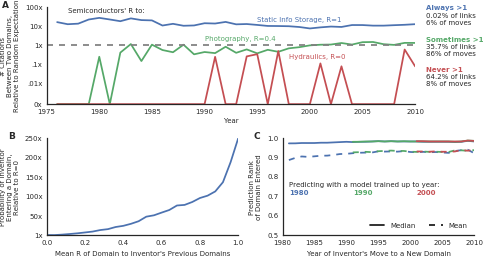

In [36]:
fig = figure(figsize=(fig_three_col,fig_three_col*golden/3))

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 8)
ax1 = plt.subplot(gs[0, :7])
ax2 = plt.subplot(gs[1,0:4])
ax3 = plt.subplot(gs[1, 4:])


annotate_coord = (-.12, 1)
panel_label = "A"

#######
ax = ax1

a = network_ratio.ix[:,positive_example[0], positive_example[1]]
ax.plot(a.index, a.values)#a.plot(label='Always More', ax=ax)

n = len(always_positive)/n_links

ax.text(2011, a.iloc[-1]+60, 'Always >1', color='b', fontweight='bold')
ax.text(2011, a.iloc[-1], '%.2f%% of links\n%.0f%% of moves'%(
                          n*100,
                         R_frequency_entries.ix[1]*100))
b = network_ratio.ix[:,between_example[0], between_example[1]]
ax.plot(b.index, b.values)#b.plot(label='Sometimes More, Sometimes Less', ax=ax)

n = len(in_between)/n_links

ax.text(2011, 1.5, 'Sometimes >1', color='g', fontweight='bold')
ax.text(2011, .3, '%.1f%% of links\n%.0f%% of moves'%(
                                                    n*100,
                                                   R_frequency_entries.iloc[1:-1].sum()*100),
    )
n = len(always_negative)/n_links

c = network_ratio.ix[:,negative_example[0], negative_example[1]]
ax.plot(c.index, c.values)#c.plot(label='Always Less', ax=ax)
ax.text(2011, .04, 'Never >1', color='r', fontweight='bold')
ax.text(2011, 0.009, '%.1f%% of links\n%.0f%% of moves'%(
                                n*100,
                               R_frequency_entries.ix[0]*100))


ax.set_yscale('symlog', linthreshy=.01)

ax.plot(ax.get_xlim(), (1,1), color='gray', linestyle='--')
ax.set_xlabel("Year", labelpad=3)
#     legend(loc='upper right')#, title="No. Citations Relative to Random Expectation")
sns.despine(ax=ax)
ax.set_ylabel("# Citations\nBetween Two Domains,\nRelative to Random Expectation")

ax.text(1977, 50, "%s' R to:"%class_data.ix[int(negative_example[0]), 'Description'])

ax.text(1995, a.ix[1995]*1.5, "%s, R=1"%(class_data.ix[int(positive_example[1]), 'Description']),# (a>1).mean()),
    color='b')

ax.text(1990, b.ix[1990]*4, "%s, R=%.1f"%(class_data.ix[int(between_example[1]), 'Description'], (b>1).mean()),
    color='g')

ax.text(1998, .2, "%s, R=0"%(class_data.ix[int(negative_example[1]), 'Description']),# (c>1).mean()),
    color='r')

ax.set_yticks([0, .01, .1, 1, 10, 100])
ax.set_yticklabels(['0x','.01x', '.1x', '1x', '10x', '100x'])

add_panel_label(ax)

#######
ax = ax2    

(pdf_r/pdf_r.ix[0]).plot(ax=ax)
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
ax.set_ylabel("Probability of Inventor\nEntering a Domain,\nRelative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
sns.despine(ax=ax)

annotate_coord = (-.2, 1)
add_panel_label(ax)

########
ax = ax3
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')


    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='--', color=p.get_color())
    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
ax.text(1981, .75, "Predicting with a model trained up to year:")
ax.set_ylim(.5,1)


ax.plot([],[], linestyle='-', color='k', label='Median')
ax.plot([],[], linestyle='--', color='k', label='Mean')
ax.legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")

ax.plot([],[], )
ax.plot([],[], linestyle='--', color='k', label='Mean')

ax.set_ylabel("Prediction Rank\nof Domain Entered")
ax.set_xlabel("Year of Inventor's Move to a New Domain")

sns.despine(ax=ax)
annotate_coord = (-.15, 1)
add_panel_label(ax)



######
#     fig.tight_layout()
gs.tight_layout(fig)
gs.update(hspace=0.35, wspace=3)
figs.append(fig)

if save_as_manuscript_figures:
    savefig(figures_directory+'empirical_statistics.pdf')

Movement Performance
====

In [45]:
entries = pd.read_hdf(data_directory+'Performance_Models/entries_for_performance_analysis.h5', 'entries')

In [46]:
def outcome_ratio_in_group(x, performance, reference_group):
    return x[performance]/x[performance+'_Mean_'+reference_group]

In [47]:
entries['Relatedness'] = entries[relatedness]

n_bins = 10
entries['Relatedness_binned'] = entries['Relatedness']
entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins
   
    
grouper = entries.groupby('Relatedness_binned')

reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'

performance_given_R_dict = {}

performance = 'Agent_Number_of_Patents_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

performance = 'Agent_Number_of_Citations_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

thresholds = [3,4,5,6]
for hit_threshold in thresholds:
    performance = 'Citations_Hit_%i'%hit_threshold
    m = grouper['Citations_Hit_%i'%hit_threshold].mean()
    s = grouper['Citations_Hit_%i'%hit_threshold].sem()
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s  

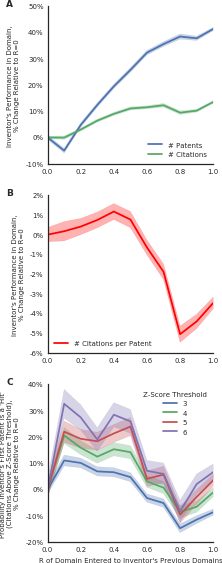

In [48]:
fig = figure(figsize=(fig_one_col,fig_one_col*2*golden))
thresholds = [3,4,5,6]
n_rows = 3
n_cols = 1
this_ax = 0

annotate_coord = (-.25, 1)
panel_label = "A"

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
performance = 'Agent_Number_of_Patents_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Patents")
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

performance = 'Agent_Number_of_Citations_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Citations")
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

legend(loc='lower right')
ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
ax.yaxis.set_major_formatter(percentdiff_formatter)
add_panel_label(ax)

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Citations per Patent", color='red')
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
ax.yaxis.set_major_formatter(percentdiff_formatter)
legend(loc='lower left')
ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
add_panel_label(ax)


this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
hit_line_colors = {}
for hit_threshold in thresholds:
    performance = 'Citations_Hit_%i'%hit_threshold
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']  
    l = plot(m.index, m.values/m.values[0], label='%i'%hit_threshold)# (%.0f%%)'%(hit_threshold, patent_count_increase))
    hit_line_colors[hit_threshold]  = l[-1].get_color()
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
ylabel("Probability Inventor's First Patent is a 'Hit'\n(Citations Above Z-Score Threshold),"
       "\n% Change Relative to R=0")# for Year and Domain)")
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.legend(loc='best', title='Z-Score Threshold')#\n(Increase in # Patents)', )
xlabel("R of Domain Entered to Inventor's Previous Domains")

add_panel_label(ax)

fig.subplots_adjust(wspace=.4)
sns.despine()

if save_as_manuscript_figures:
        savefig(figures_directory+'performance_empirical_outcome_ratios_relative_to_0.pdf',
               bbox_inches='tight')

In [49]:
performance_model_store = pd.HDFStore(data_directory+'Performance_Models/performance_models.h5',
                                     mode='r')

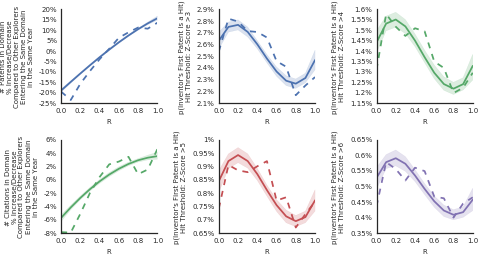

In [50]:
fig = figure(figsize=(fig_three_col,fig_one_col*golden))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3)
annotate_coord = (-.25, 1)
panel_label = "A"


hdf_label = 'counts'
prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

ax = plt.subplot(gs[0, 0])
outcome = 'Agent_Number_of_Patents_in_Class'
m = performance_given_R_dict[outcome]['m']
l = ax.plot(m.index, m.values, linestyle='--', color='b')
c = l[-1].get_color()

ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[outcome,.025],
                        prediction_quantiles_given_R[outcome,.975],
                        alpha=.2,
               color=c)
ax.plot(prediction_quantiles_given_R.minor_axis,
        prediction_quantiles_given_R[outcome,.5],
       color=c)
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.set_ylabel("# Patents in Domain\n% Increase/Decrease\nCompared to Other Explorers\nEntering the Same Domain\nin the Same Year")
ax.set_xlabel("R")


ax = plt.subplot(gs[1, 0])
outcome = 'Agent_Number_of_Citations_in_Class'
m = performance_given_R_dict[outcome]['m']
l = ax.plot(m.index, m.values, linestyle='--', color='g')
c = l[-1].get_color()

ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[outcome,.025],
                        prediction_quantiles_given_R[outcome,.975],
                        alpha=.2,
               color=c)
ax.plot(prediction_quantiles_given_R.minor_axis,
        prediction_quantiles_given_R[outcome,.5],
       color=c)
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.set_ylabel("# Citations in Domain\n% Increase/Decrease\nCompared to Other Explorers\nEntering the Same Domain\nin the Same Year")
ax.set_xlabel("R")

######
hdf_label = 'hits'
prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

for hit_threshold, coor in zip(thresholds, [(0,1), (0,2), (1,1), (1,2)]):
    ax = plt.subplot(gs[coor[0], coor[1]])
    performance = 'Citations_Hit_%i'%hit_threshold
    m = performance_given_R_dict[performance]['m']
    c = hit_line_colors[hit_threshold]
    l = plot(m.index, m.values, linestyle='--', color=c)

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[hit_threshold,.025],
                        prediction_quantiles_given_R[hit_threshold,.975],
                        alpha=.2,
               color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[hit_threshold,.5],
           color=c)

    ylabel("p(Inventor's First Patent is a Hit)\nHit Threshold: Z-Score >%i"%hit_threshold)
    xlabel("R")
    ax.yaxis.set_major_formatter(percent_formatter)

sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
        savefig(figures_directory+'performance_with_models.pdf',
               bbox_inches='tight')

In [51]:
def model_parameters(all_samples, formula_variables, formula_variables_labels,
                     legend_title, legend_labels=None):
    fig = figure(figsize=(fig_three_col, fig_three_col*golden))

    outcomes = all_samples.items
    
    n_rows = len(formula_variables)
    n_cols = 1
    this_ax = 0

    from scipy.stats import scoreatpercentile
    from bisect import bisect_left

    var_i = 0
    for col in formula_variables:
        this_ax +=1
        ax = fig.add_subplot(n_rows, n_cols, this_ax)
        for outcome in outcomes:
            if legend_labels is None:
                label = '{0}'.format(outcome).replace('_',' ')
            else:
                label = legend_labels[outcome]
            p = sns.kdeplot(all_samples[outcome][col], ax=ax, label=label, legend=False)
            p = p.get_lines()[-1]
            x,y = p.get_data()
            c = p.get_color()
            lower = scoreatpercentile(all_samples[outcome][col], 2.5)
            upper = scoreatpercentile(all_samples[outcome][col], 97.5)
            lower_ind = bisect_left(x,lower)
            upper_ind = bisect_left(x,upper) 
            ax.fill_between(x[lower_ind:upper_ind], y[lower_ind:upper_ind], alpha=.4, color=c)
        col_label = formula_variable_labels[col]
        var_i+=1
        ax.set_xlabel(col_label)
        ax.set_yticks([])
        if ax.get_xlim()[0]<=0 and ax.get_xlim()[1]>=0:
            ax.axvline(0, color='black', linestyle='--', linewidth=.5)
        if this_ax==1:
            legend(loc='best',ncol=4, title=legend_title)
    fig.tight_layout()
    
    sns.despine(left=True)
#     fig.tight_layout()
    return fig

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


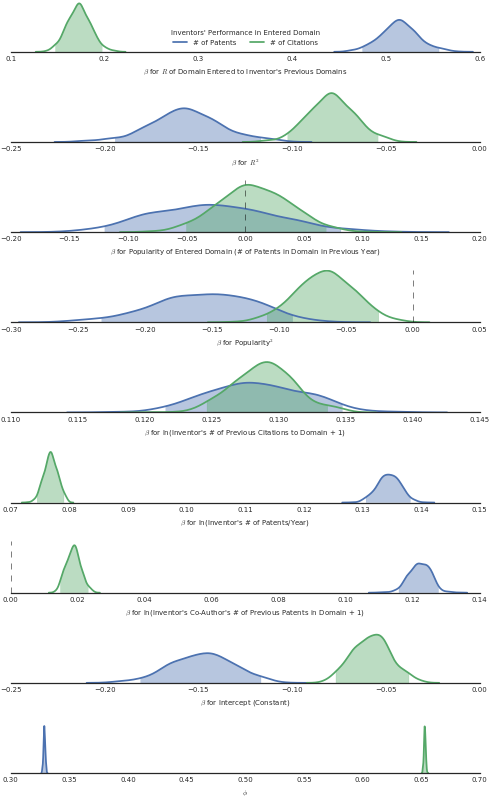

In [52]:
hdf_label = 'counts'
all_samples = performance_model_store['%s/model_samples_thinned'%hdf_label]
formula_variables = performance_model_store['%s/formula_variables'%hdf_label]#.values.tolist()

formula_variable_labels = {'Intercept': r"$\beta$ for Intercept (Constant)",
                           'Relatedness':r"$\beta$ for $R$ of Domain Entered to Inventor's Previous Domains",
                          'np.power(Relatedness, 2)':r'$\beta$ for $R^2$',
                          'Popularity':r'$\beta$ for Popularity of Entered Domain (# of Patents in Domain in Previous Year)',                                               
                          'np.power(Popularity, 2)':r'$\beta$ for Popularity$^2$',
                          'log(Agent_Previous_Citations_to_Class+1)':r"$\beta$ for ln(Inventor's # of Previous Citations to Domain + 1)",
                          'log(CoAgent_Previous_Patent_Count_in_Class+1)':r"$\beta$ for ln(Inventor's Co-Author's # of Previous Patents in Domain + 1)",
                          'log(Agent_Productivity_Patents)':r"$\beta$ for ln(Inventor's # of Patents/Year)",
                           'phi': '$\phi$'
                          }

formula_variables = formula_variables.values.tolist()

all_samples = all_samples.sort_index(ascending=False)

fig = model_parameters(all_samples, formula_variables+['Intercept']+['phi'], formula_variable_labels,
                       "Inventors' Performance in Entered Domain",
                       legend_labels={'Agent_Number_of_Patents_in_Class': '# of Patents',
                                      'Agent_Number_of_Citations_in_Class': '# of Citations',
                                     }
                      )
if save_as_manuscript_figures:
        savefig(figures_directory+'counts_model_parameters.pdf',
               bbox_inches='tight')    

/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


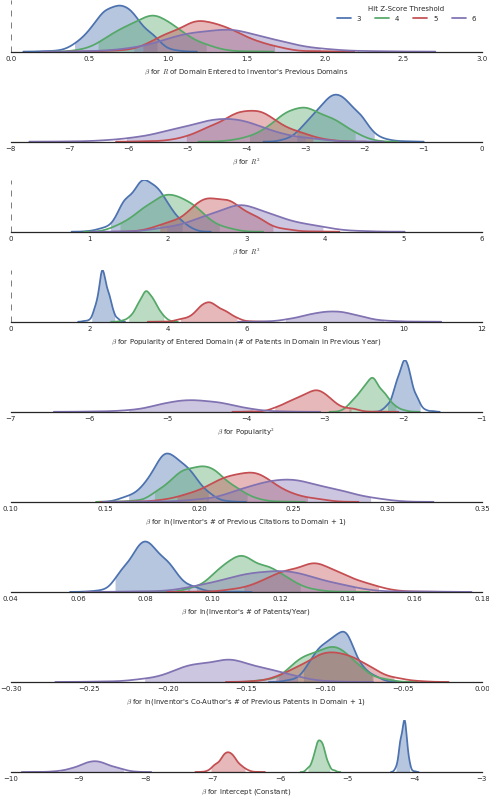

In [53]:
hdf_label = 'hits'
all_samples = performance_model_store['%s/model_samples_thinned'%hdf_label]
formula_variables = performance_model_store['%s/formula_variables'%hdf_label]#.values.tolist()

formula_variable_labels = {'Intercept': r"$\beta$ for Intercept (Constant)",
                           'Relatedness':r"$\beta$ for $R$ of Domain Entered to Inventor's Previous Domains",
                          'np.power(Relatedness, 2)':r'$\beta$ for $R^2$',
                          'np.power(Relatedness, 3)':r'$\beta$ for $R^3$',                           
                          'Popularity':r'$\beta$ for Popularity of Entered Domain (# of Patents in Domain in Previous Year)',                                               
                          'np.power(Popularity, 2)':r'$\beta$ for Popularity$^2$',
                          'log(Agent_Previous_Citations_to_Class+1)':r"$\beta$ for ln(Inventor's # of Previous Citations to Domain + 1)",
                          'log(CoAgent_Previous_Patent_Count_in_Class+1)':r"$\beta$ for ln(Inventor's Co-Author's # of Previous Patents in Domain + 1)",
                          'log(Agent_Productivity_Patents)':r"$\beta$ for ln(Inventor's # of Patents/Year)",
                           'phi': '$\phi$'
                          }
formula_variables = formula_variables.values.tolist()

all_samples = all_samples.sort_index(ascending=True)

fig = model_parameters(all_samples, formula_variables+['Intercept'], formula_variable_labels,
                       "Hit Z-Score Threshold",
                      )
if save_as_manuscript_figures:
        savefig(figures_directory+'hits_model_parameters.pdf',
               bbox_inches='tight')    

Case Studies
====

In [189]:
store = pd.HDFStore(data_directory+'organized_patent_data.h5')
class_data = store['classes_lookup_IPC4']
class_data.set_index('Class_Name', inplace=True)

class_names = pd.read_csv(data_directory+'IPC4_descriptions.csv')
class_names.set_index('Class', inplace=True)
class_data['Description'] = class_names.ix[class_data.index.values, 'Short Description'].values

class_data = class_data.reset_index().set_index('Class_ID')
class_data.rename(columns={'Class_Name': 'IPC4'}, inplace=True)

agents_lookup = store['agents_lookup_explorers_IPC4']

agent_names = pd.read_csv(data_directory+'inv_id_names.csv')

agent_names = agent_names[~agent_names['INV_ID'].duplicated()]

agent_names.set_index('INV_ID', inplace=True)
agents_lookup['Surname'] = agent_names.ix[agents_lookup['Disambiguation_ID'].values, 'LASTNAME'].values
agents_lookup['Given Name'] = agent_names.ix[agents_lookup['Disambiguation_ID'].values, 'FIRSTNAME'].values

In [190]:
entries['Class_IPC4'] = class_data.ix[entries['Class_ID'], 'IPC4'].values

entries['Agent_Home_Class_IPC4'] = class_data.ix[entries['Agent_Home_Class'], 'IPC4'].values

In [191]:
reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
entries['Patent_Count_Outcome_Ratio'] = outcome_ratio_in_group(entries, 'Agent_Number_of_Patents_in_Class', reference_group)

entries['Citations_Outcome_Ratio'] = outcome_ratio_in_group(entries, 'First_Patent_Citations', 'for_Year_and_Class')

In [192]:
performance_variable = 'Agent_Number_of_Patents_in_Class'
baseline_variable = '_Mean_for_Year_and_Class_of_New_Immigrants_to_Class'
baseline = performance_variable + baseline_variable

candidate_indices = {}

candidate_indices['move_related_high_patents_no_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                                         * (entries['Agent_Class_Number']==2)
                                                         * (entries[relatedness]>=.9)
                                                         * (entries[performance_variable]/entries[baseline] > 2)
                                                         * (entries['Application_Year']>1990)
                                                         * (~entries['Citations_Hit_3'].astype('bool'))
                                                         * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                                         * (entries['Agent_Previous_Citations_to_Class']==0)
                                                        )
print(candidate_indices['move_related_high_patents_no_hit'].sum())

candidate_indices['move_unrelated_no_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                           * (entries['Agent_Class_Number']==2)
                                           * (entries[relatedness]<=.5) * (entries[relatedness]>=.1)
                                           * (entries[performance_variable]/entries[baseline] < .5)
                                           * (entries['Application_Year']>1990)
                                           * (~entries['Citations_Hit_3'].astype('bool'))
                                           * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                           * (entries['Agent_Previous_Citations_to_Class']==0)
                                          )
print(candidate_indices['move_unrelated_no_hit'].sum())

candidate_indices['move_unrelated_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                           * (entries['Agent_Class_Number']==2)
                                           * (entries[relatedness]<=.5) * (entries[relatedness]>=.1)
#                                            * (entries[performance_variable]/entries[baseline] < 1)
                                           * (entries['Application_Year']>1990)
                                           * (entries['Citations_Hit_5'].astype('bool'))
                                           * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                           * (entries['Agent_Previous_Citations_to_Class']==0)
                                          )
print(candidate_indices['move_unrelated_hit'].sum())

22735
62311
715


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [193]:
matched_case_studies = entries.ix[candidate_indices['move_related_high_patents_no_hit']].merge(entries.ix[candidate_indices['move_unrelated_hit']],
                                                                                 on=['Class_ID', 'Application_Year'],
                                                                                 suffixes=('', '_unrelated_hit'))

matched_case_studies = matched_case_studies.merge(entries.ix[candidate_indices['move_unrelated_no_hit']],
                                                                                 on=['Class_ID', 'Application_Year'],
                                                                                 suffixes=('', '_unrelated_no_hit'))

In [194]:
candidate_classes = matched_case_studies['Class_ID'].value_counts()

candidate_classes.name = 'Number_of_Matches'

pd.DataFrame(candidate_classes).join(class_data)

,Number_of_Matches,IPC4,Description
539,284325,G06F,Digital Data Processing
162,56818,B32B,Layered Products
586,31551,H01L,Semiconductor devices
66,23871,A61K,Medical Preparations
518,18755,G02B,Optical Systems
510,15912,G01N,Analyzing Materials
542,15035,G06K,Data Recording
616,12231,H04L,Digital Telecommunication
612,10257,H04B,Transmission
10,7788,A01N,Preserving Carcasses


In [195]:
for label in ['', '_unrelated_hit', '_unrelated_no_hit']:
    matched_case_studies['Agent_Home_Class_Name'+label] = class_data.ix[matched_case_studies['Agent_Home_Class'+label], 'Description'].values
    
    matched_case_studies['Name'+label] = (agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Given Name'] + ' ' +
                                          agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Surname']
                                         ).values

In [196]:
classes_of_interest = ['C07D']#, 'A61K','C07C', 'C08G', 'B01J', 'A61B']

for class_of_interest in classes_of_interest:
    ind = ((matched_case_studies['Class_IPC4']==class_of_interest) *
           (matched_case_studies['Agent_Number_of_Patents_in_Class']/matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit'] > 5) *
           (matched_case_studies['Agent_Number_of_Patents_in_Class']>10) *
           (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit']<5) *
           (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_hit']<10) *
           (matched_case_studies['Citations_unrelated_hit']>20) *
           (matched_case_studies['Citations_unrelated_no_hit']<10) *
           (matched_case_studies['Citations']<10) *
            (matched_case_studies['Citations_unrelated_hit']/matched_case_studies['Citations_unrelated_no_hit'] > 5) * 
           (matched_case_studies['Agent_Home_Class_unrelated_hit']!=matched_case_studies['Agent_Home_Class_unrelated_no_hit'])
          )
    print(sum(ind))
    info = ['Agent_Home_Class_Name',
           'Name',
            'Agent_ID',
           'Agent_Number_of_Patents_in_Class',
            'Citations',
            'Agent_Home_Class_IPC4',
            'Relatedness',
            'Patent_Count_Outcome_Ratio',
            'Citations_Outcome_Ratio',
           ]
    all_info = []
    for i in info:
        for label in ['', '_unrelated_hit', '_unrelated_no_hit']:
            all_info.append(i+label)
    class_description = class_data.set_index('IPC4').ix[class_of_interest, 'Description']
    print(class_of_interest, class_description)
    matched_case_studies.ix[ind, all_info].to_csv(data_directory+'Examples_and_Visualizations/case_studies_%s_%s.csv'%(class_description, class_of_interest))

251
C07D Heterocyclic Compounds


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


Comparison of Alternative Relatedness Measures
===

In [30]:
relatedness_types = ['Class_Cited_by_Class_Count', 'Class_CoOccurrence_Count_Inventor', 'Class_CoOccurrence_Count_PID']
relatedness_type_names = ['Citations', 'Inventor Co-Occurrence', 'Co-Classification']

Prediction
---

Citations
Inventor Co-Occurrence
Co-Classification


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


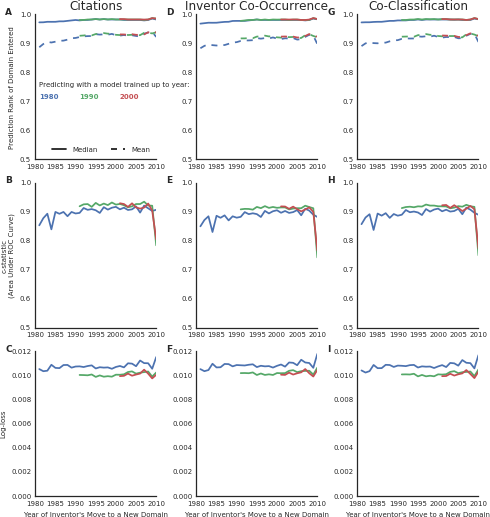

In [106]:
target = 'entries_with_predictions_NB_4D'

store = pd.HDFStore(data_directory+'Agent_Entries/agent_%s_%s.h5'%(target, class_system), mode='r')
entries = store['%s_%s'%(target, class_system)]
store.close()

fig = figure(figsize=(fig_three_col,fig_one_col*2*golden))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
this_ax = 0
annotate_coord = (-.25, 1)
panel_label = "A"

col = 0
for relatedness_type, relatedness_type_name in zip(relatedness_types, relatedness_type_names):
    print(relatedness_type_name)
    relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type
    
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')


        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='--', color=p.get_color())
        if col==0:
            text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
    ax.set_ylim(.5,1)


    if col==0:
        text(1981, .75, "Predicting with a model trained up to year:")
        plot([],[], linestyle='-', color='k', label='Median')
        plot([],[], linestyle='--', color='k', label='Mean')
        legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")
        ax.set_ylabel("Prediction Rank of Domain Entered")
        
    ax.set_title(relatedness_type_name)
    add_panel_label(ax)

    #####
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1

    from sklearn.metrics import auc
    import powerlaw
    f = lambda x: auc(*powerlaw.ccdf(x))
    def f(x):
        try:
            return auc(*powerlaw.ccdf(x))
        except:
            return nan

    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].agg(f)[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')

    ax.set_ylim(.5,1)
    if col==0:
        ax.set_ylabel("c-statistic\n(Area Under ROC Curve)")
    add_panel_label(ax)


    ##########
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_log_loss_from_'+column_label].agg(f)[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')
    ax.set_ylim(ymin=0)
    if col==0:
        ax.set_ylabel("Log-loss")
    ax.set_xlabel("Year of Inventor's Move to a New Domain")
    add_panel_label(ax)
    
    col += 1
    this_ax = 0

sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
        savefig(figures_directory+'prediction_alternative_relatedness.pdf',
               bbox_inches='tight')

Performance
---

Citations
Inventor Co-Occurrence
Co-Classification


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


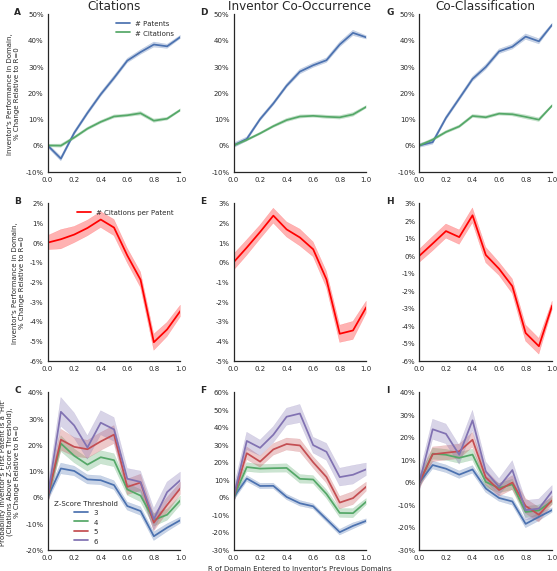

In [31]:
fig = figure(figsize=(fig_three_col,fig_one_col*2*golden))

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
this_ax = 0
annotate_coord = (-.25, 1)
panel_label = "A"

thresholds = [3,4,5,6]

col = 0

entries = pd.read_hdf(data_directory+'Performance_Models/entries_for_performance_analysis.h5', 'entries')

for relatedness_type, relatedness_type_name in zip(relatedness_types, relatedness_type_names):
    print(relatedness_type_name)
    relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type
    entries['Relatedness'] = entries[relatedness]

    n_bins = 10
    entries['Relatedness_binned'] = entries['Relatedness']
    entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
    entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins


    thresholds = [3,4,5,6]


    grouper = entries.groupby('Relatedness_binned')

    performance_given_R_dict = {}
    reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
   
    performance = 'Agent_Number_of_Patents_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    performance = 'Agent_Number_of_Citations_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    for hit_threshold in thresholds:
        performance = 'Citations_Hit_%i'%hit_threshold
        m = grouper['Citations_Hit_%i'%hit_threshold].mean()
        s = grouper['Citations_Hit_%i'%hit_threshold].sem()
        performance_given_R_dict[performance] = {}
        performance_given_R_dict[performance]['m'] = m
        performance_given_R_dict[performance]['s'] = s  


    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    performance = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Patents")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

    performance = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
   
    if col==0:
        ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
        legend(loc='best')
    ax.yaxis.set_major_formatter(percentdiff_formatter)
    add_panel_label(ax)
    ax.set_title(relatedness_type_name)
    
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations per Patent", color='red')
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
    ax.yaxis.set_major_formatter(percentdiff_formatter)
    if col==0:
        legend(loc='best')
        ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
    add_panel_label(ax)


    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for hit_threshold in thresholds:
        performance = 'Citations_Hit_%i'%hit_threshold
        m = performance_given_R_dict[performance]['m']
        s = performance_given_R_dict[performance]['s']  
        l = plot(m.index, m.values/m.values[0], label='%i'%hit_threshold)# (%.0f%%)'%(hit_threshold, patent_count_increase))
        error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    if col==0:
        ax.set_ylabel("Probability Inventor's First Patent is a 'Hit'\n(Citations Above Z-Score Threshold),"
               "\n% Change Relative to R=0")# for Year and Domain)")
        ax.legend(loc='best', title='Z-Score Threshold')#\n(Increase in # Patents)', )
    if col==1:
        xlabel("R of Domain Entered to Inventor's Previous Domains")
    add_panel_label(ax)
    
    col += 1
    this_ax = 0

fig.subplots_adjust(wspace=.4)
sns.despine()

if save_as_manuscript_figures:
        savefig(figures_directory+'performance_alternative_relatedness.pdf',
               bbox_inches='tight')

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
plots = PdfPages(data_directory+'Examples_and_Visualizations/Figures.pdf')
for i in figs:
    print(i)
    plots.savefig(i, bbox_inches='tight')
plots.close()